In [5]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv(r"C:\Users\ds1de\aie-group-2\artificial_intelligence_engineering\homeworks\HW02\S02-hw-dataset.csv")

# Первые строки
print("ПЕРВЫЕ СТРОКИ ДАННЫХ:")
print(df.head())

# Информация о столбцах и типах
print("\nИНФОРМАЦИЯ О ДАННЫХ:")
print(df.info())

# Базовые описательные статистики
print("\nОПИСАТЕЛЬНЫЕ СТАТИСТИКИ:")
print(df.describe())

ПЕРВЫЕ СТРОКИ ДАННЫХ:
   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296

ИНФОРМАЦИЯ О ДАННЫХ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None

ОПИСАТЕЛЬНЫЕ СТАТИСТИКИ:
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269

In [6]:
# Доля пропусков в каждом столбце
print("ДОЛЯ ПРОПУСКОВ:")
print(df.isna().mean())

# Дублирующие строки
print("\nДУБЛИРУЮЩИЕ СТРОКИ:")
print("Количество полных дубликатов:", df.duplicated().sum())

# Подозрительные случаи
print("\nПОДОЗРИТЕЛЬНЫЕ ЗНАЧЕНИЯ:")
print("Отрицательные покупки:", df[df['purchases'] < 0][['user_id', 'purchases']])
print("Возраст < 18 или > 100:", df[(df['age'] < 18) | (df['age'] > 100)][['user_id', 'age']])
print("Нулевой доход при ненулевых покупках:", df[(df['revenue'] == 0) & (df['purchases'] > 0)][['user_id', 'purchases', 'revenue']])

# Текстовое описание проблем
print("\nОПИСАНИЕ ПРОБЛЕМ КАЧЕСТВА ДАННЫХ:")
print("""
Обнаружены следующие проблемы качества данных:
1. Пропуски в столбце возраста (2 записи)
2. Дубликат пользователя с user_id=10
3. Подозрительные значения: отрицательное количество покупок (-1), возраст 5 и 120 лет, 
   нулевой доход при наличии покупок, что может указывать на ошибки в данных или специальные случаи.
""")

=== ДОЛЯ ПРОПУСКОВ В КАЖДОМ СТОЛБЦЕ ===
user_id      0.000000
age          4.878049
country      0.000000
purchases    0.000000
revenue      0.000000
dtype: float64

=== ДУБЛИРУЮЩИЕ СТРОКИ ===
Количество полных дубликатов: 1
Дубликаты по user_id: 1
Дублирующиеся user_id:
    user_id   age country
9        10  24.0      RU
40       10  24.0      RU

=== ПОДОЗРИТЕЛЬНЫЕ ЗНАЧЕНИЯ ===
1. Отрицательные покупки:
   user_id  purchases  revenue
5        6         -1      785

2. Подозрительный возраст (<18 или >100):
    user_id    age country
5         6  120.0      FR
20       21    5.0      RU

3. Нулевой доход при ненулевых покупках:
    user_id  purchases  revenue
10       11          4        0

4. Пропуски в возрасте:
    user_id  age country  purchases
4         5  NaN      DE          6
12       13  NaN      US          9

ОПИСАНИЕ ПРОБЛЕМ КАЧЕСТВА ДАННЫХ:

Обнаружены следующие проблемы качества данных:

1. ПРОПУСКИ: В столбце 'age' обнаружены пропуски (2 записи/ей), что составляет 4.9

In [7]:
# Частоты для категориальных переменных
print("ЧАСТОТЫ ПО СТРАНАМ:")
print(df['country'].value_counts())

# Группировка с агрегатами
print("\nГРУППИРОВКА ПО СТРАНАМ:")
grouped = df.groupby('country').agg({
    'age': ['mean', 'median'],
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum']
})
print(grouped)

# Создание возрастных групп
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100], 
                        labels=['<18', '18-30', '31-45', '46-60', '>60'])

print("\nРАСПРЕДЕЛЕНИЕ ПО ВОЗРАСТНЫМ ГРУППАМ:")
print(df['age_group'].value_counts())

# Текстовые наблюдения
print("\nОСНОВНЫЕ НАБЛЮДЕНИЯ:")
print("""
1. Доминируют пользователи из России (RU) и Франции (FR)
2. Средний возраст пользователей варьируется от 24 до 39 лет в зависимости от страны
3. Пользователи из Германии (DE) показывают наибольший средний доход
4. Наблюдается неожиданный эффект - пользователи с пропущенным возрастом имеют высокую активность покупок
""")

ЧАСТОТЫ ПО СТРАНАМ:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

ГРУППИРОВКА ПО СТРАНАМ:
               age        purchases          revenue       
              mean median      mean sum         mean    sum
country                                                    
CN       24.000000   24.0  4.500000   9  1054.000000   2108
DE       34.600000   35.0  6.500000  39  1445.500000   8673
FR       46.250000   42.0  4.250000  51   675.916667   8111
RU       30.076923   26.0  4.769231  62   790.076923  10271
US       36.714286   39.0  4.625000  37   557.375000   4459

РАСПРЕДЕЛЕНИЕ ПО ВОЗРАСТНЫМ ГРУППАМ:
age_group
31-45    14
18-30    13
46-60     9
<18       2
>60       0
Name: count, dtype: int64

ОСНОВНЫЕ НАБЛЮДЕНИЯ:

1. Доминируют пользователи из России (RU) и Франции (FR)
2. Средний возраст пользователей варьируется от 24 до 39 лет в зависимости от страны
3. Пользователи из Германии (DE) показывают наибольший средний доход
4. Наблюдается неожиданный э

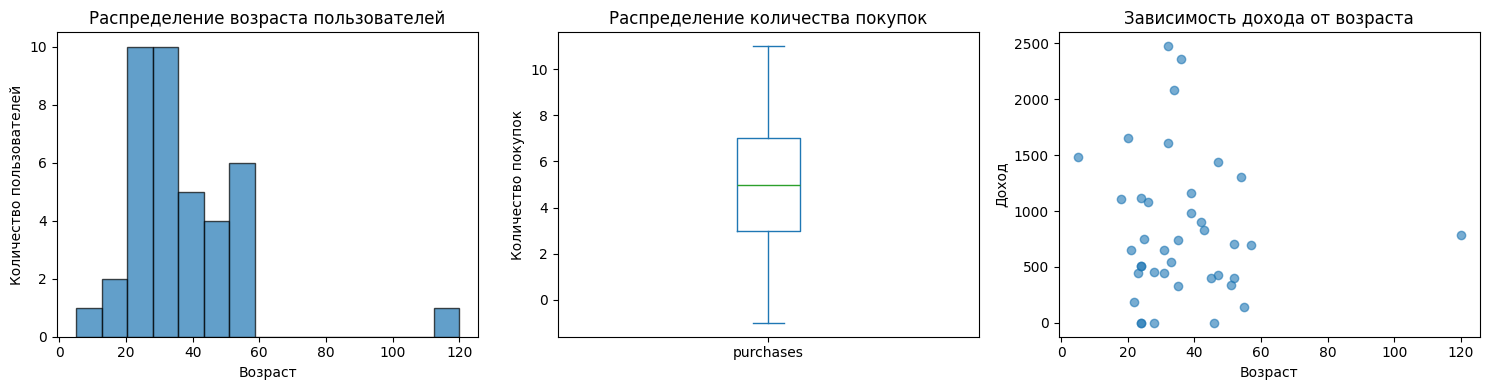

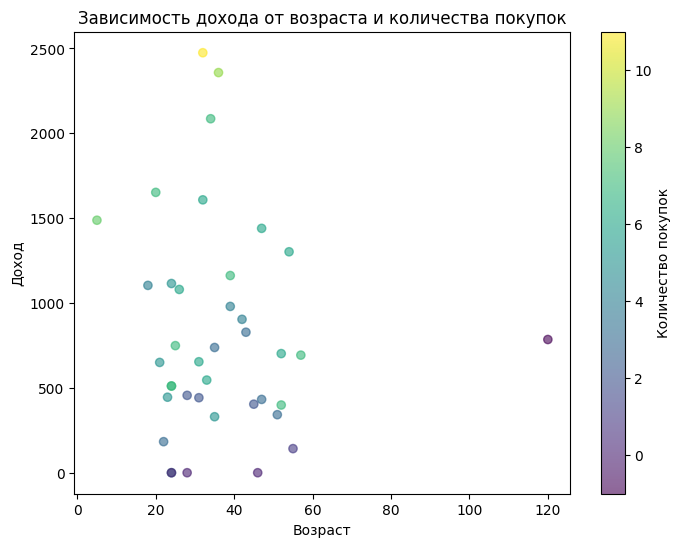

График сохранен в папку figures/


In [8]:
# 1. Гистограмма для количественного признака
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(df['age'].dropna(), bins=15, edgecolor='black', alpha=0.7)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

# 2. Боксплот для количественного признака
plt.subplot(1, 3, 2)
df['purchases'].plot(kind='box')
plt.title('Распределение количества покупок')
plt.ylabel('Количество покупок')

# 3. Scatter plot для пары количественных признаков
plt.subplot(1, 3, 3)
plt.scatter(df['age'], df['revenue'], alpha=0.6)
plt.title('Зависимость дохода от возраста')
plt.xlabel('Возраст')
plt.ylabel('Доход')

plt.tight_layout()
plt.show()

# Сохранение графика в папку figures
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['revenue'], alpha=0.6, c=df['purchases'], cmap='viridis')
plt.colorbar(label='Количество покупок')
plt.title('Зависимость дохода от возраста и количества покупок')
plt.xlabel('Возраст')
plt.ylabel('Доход')
plt.savefig('figures/age_revenue_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("График сохранен в папку figures/")